Цель:
Изучить методы отбора признаков для эффективного обучения моделей машинного обучения.
 Для этого в работе необходимо применить различные методы по отбору признаков. Данные для этого задания будут сгенерированы, чтобы избежать признаков с физическим смыслом.

https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectKBest.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SelectFromModel.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.SequentialFeatureSelector.html


1.Сгенерируем данные с помощью кода:

In [ ]:
from sklearn.datasets import make_classification
x, y = make_classification(scale=1)

In [ ]:
accur = []

2. Построим модель логистической регрессии и оценим среднюю точность.

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

score = cross_val_score(LogisticRegression(), x, y, scoring='accuracy').mean()
accur.append(f'init score {score}')
score

0.85

3. Используем статистические методы для отбора признаков:

In [ ]:
import pandas as pd

df =pd.DataFrame(x)
df['tar'] =y

In [ ]:
df.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,tar
0,0.095283,-0.275318,-0.220089,0.800326,-1.202731,-0.943614,0.187573,-2.200836,1.904822,-1.570642,...,-0.139945,-1.598538,-0.152095,-0.162611,-1.862036,0.770602,-0.297658,-0.837758,1.589195,0
1,1.735655,-0.167135,0.403604,-0.278247,-0.421689,0.856990,-0.652514,0.439502,0.338583,-0.065342,...,0.213747,0.820370,0.212992,0.474779,-0.962788,-2.039053,-1.023484,0.464663,0.953020,1
2,-0.992658,-0.285907,0.604268,-1.687931,1.053769,-1.108393,0.211313,1.294841,-1.442290,1.122284,...,-0.159055,-1.159119,-1.736652,-1.055688,-0.117953,0.237046,0.186608,0.007578,-0.476704,1
3,0.409213,-1.142724,0.350782,1.711528,-0.985575,0.353547,0.255560,-1.975211,-0.486734,-1.355881,...,-1.611002,1.096126,0.754002,-0.818481,-1.244380,0.585145,-0.863406,-0.238296,-0.260657,0
4,-0.189309,-0.084555,-0.634758,1.458953,-1.850137,-0.263601,-2.332021,1.033195,1.635031,-0.645376,...,-1.456435,0.226353,-0.607816,-0.296172,-0.259638,1.230104,-0.167473,-1.866088,1.460956,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 21 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       100 non-null    float64
 1   1       100 non-null    float64
 2   2       100 non-null    float64
 3   3       100 non-null    float64
 4   4       100 non-null    float64
 5   5       100 non-null    float64
 6   6       100 non-null    float64
 7   7       100 non-null    float64
 8   8       100 non-null    float64
 9   9       100 non-null    float64
 10  10      100 non-null    float64
 11  11      100 non-null    float64
 12  12      100 non-null    float64
 13  13      100 non-null    float64
 14  14      100 non-null    float64
 15  15      100 non-null    float64
 16  16      100 non-null    float64
 17  17      100 non-null    float64
 18  18      100 non-null    float64
 19  19      100 non-null    float64
 20  tar     100 non-null    int64  
dtypes: float64(20), int64(1)
memory usage: 1

<Axes: >

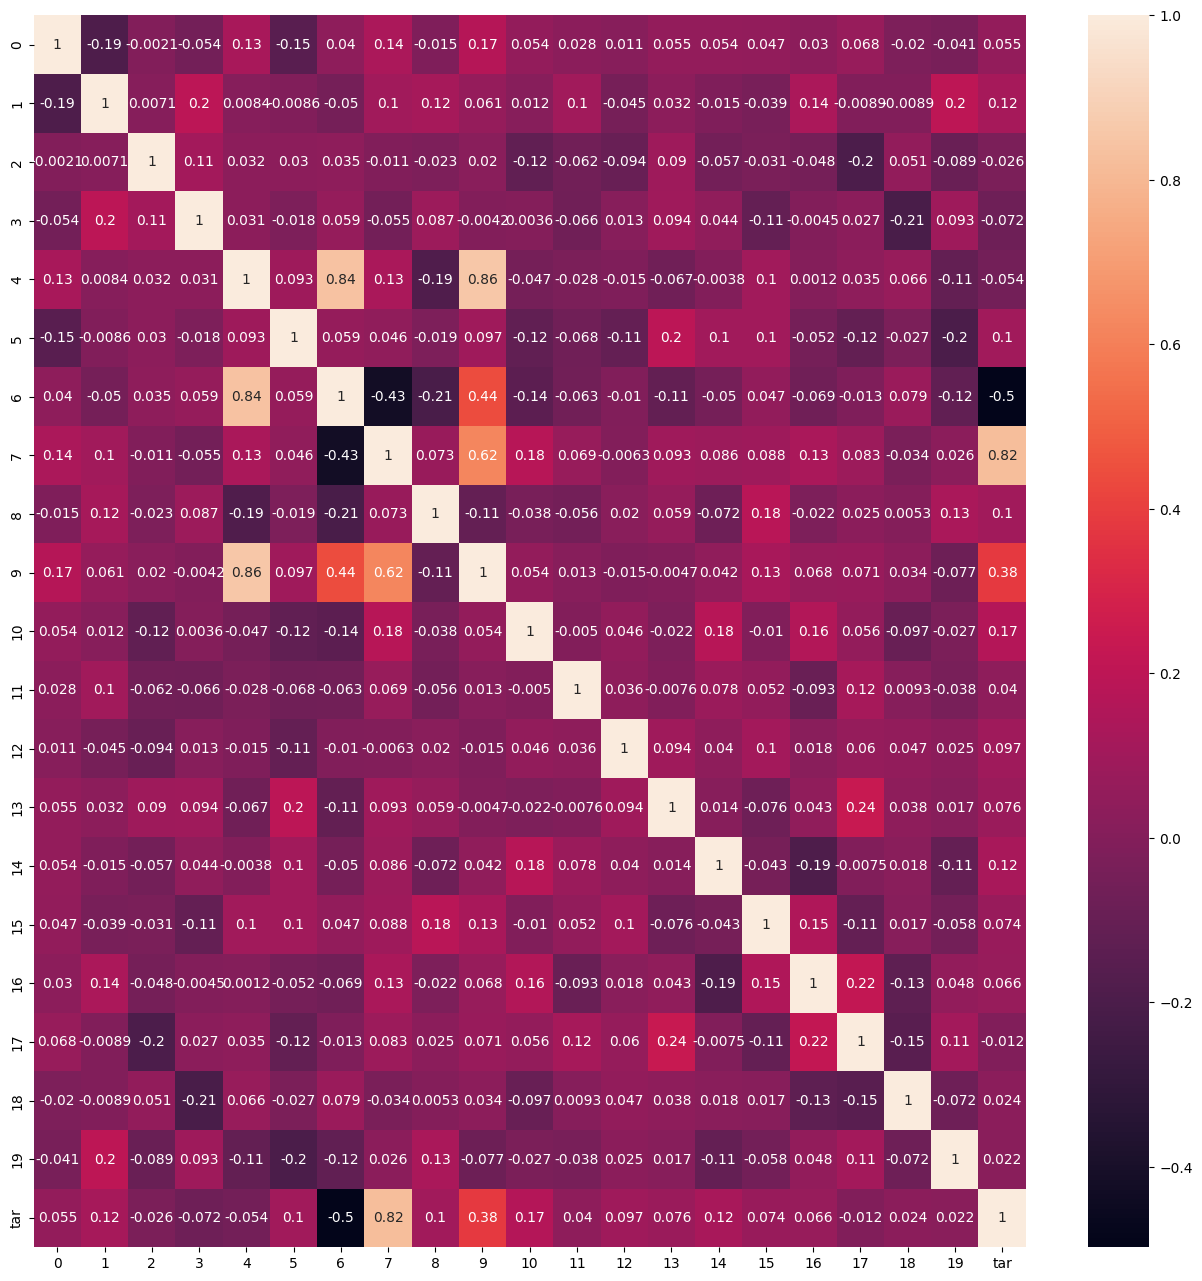

In [ ]:
import seaborn as sns

corr =df.corr()
plt.figure(figsize =(16,16))
sns.heatmap(corr, annot = True)

In [ ]:
df1 =df[[6,7,8,9,10]]# признаки 6,7 8,9, 10 наиболее важные

In [ ]:
df1.head()

,6,7,8,9,10
0,0.187573,-2.200836,1.904822,-1.570642,1.005807
1,-0.652514,0.439502,0.338583,-0.065342,-0.415118
2,0.211313,1.294841,-1.442290,1.122284,0.662790
3,0.255560,-1.975211,-0.486734,-1.355881,0.959941
4,-2.332021,1.033195,1.635031,-0.645376,-0.718225


In [ ]:
score = cross_val_score(LogisticRegression(), df1, df.tar, scoring='accuracy').mean()

accur.append(f'corr matrix score {score}')
score

0.9099999999999999

4. Осуществим отбор признаков на основе дисперсионного анализа:

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

In [ ]:
selector = SelectKBest ( f_classif, k=5)

x_tr = selector.fit_transform(x,y)

score = cross_val_score(LogisticRegression(), x_tr, y, scoring='accuracy').mean()

accur.append(f'analysis of variance score {score}')
score

0.9199999999999999

5. Отбор с использованием моделей:
a) Реализуем отбор признаков с помощью логистической регрессии. Отобранные признаки подайте далее на вход в саму логистическую регрессию (SelectFromModel). Используя L1 регуляризацию реализуем отбор признаков с помощью модели RandomForest и встроенного атрибута feature_impotance.


In [ ]:
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel

svc = LinearSVC( C = 0.2).fit (x,y)

selector =SelectFromModel(svc, prefit =False)
x_tr = selector.fit_transform(x,y)


score = cross_val_score(LogisticRegression(), x_tr, y, scoring='accuracy').mean()

accur.append(f'logReg score {score}')
score

0.9299999999999999

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier( random_state=7)
model.fit(x,y)

imps = pd.Series(model.feature_importances_)

imps.sort_values()

12    0.015754
17    0.016544
8     0.017108
0     0.017225
2     0.017710
11    0.018113
15    0.020542
13    0.021790
14    0.023421
3     0.023892
10    0.024352
16    0.026629
18    0.027350
5     0.028316
1     0.029369
4     0.032151
19    0.038509
9     0.080654
6     0.138256
7     0.382315
dtype: float64

In [ ]:
score = cross_val_score(LogisticRegression(), df[[7,6,9,19,4]], y, scoring='accuracy').mean()

accur.append(f'random_forest score {score}')
score

0.9199999999999999

Попробуем перебрать признаки

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector

sns_forward = SequentialFeatureSelector(
    RandomForestClassifier( random_state=7), n_features_to_select =5, direction = 'forward'
    )
sns_forward.fit(x,y)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=7),
                          n_features_to_select=5)

In [ ]:
x_tr = sns_forward.transform(x)

In [ ]:
score = cross_val_score(LogisticRegression(), x_tr, y, scoring='accuracy').mean()

accur.append(f'SequentialFeatureSelector score {score}')
score

0.9099999999999999

Выводы

In [ ]:
accur

['init score 0.85',
 'corr matrix score 0.9099999999999999',
 'analysis of variance score 0.9199999999999999',
 'logReg score 0.9299999999999999',
 'random_forest score 0.9199999999999999',
 'SequentialFeatureSelector score 0.9099999999999999']

Удаление слабо коррелирующих признаков может увеличить точность модели, что мы и видим. Наилучшую точность дает лоарифмическая регрессия.